In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("card_transdata 140000.csv")

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df1=df.head(10000)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  float64
 4   used_chip                       10000 non-null  float64
 5   used_pin_number                 10000 non-null  float64
 6   online_order                    10000 non-null  float64
 7   fraud                           10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x=df1.drop('fraud',axis=1)
y=df1['fraud']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

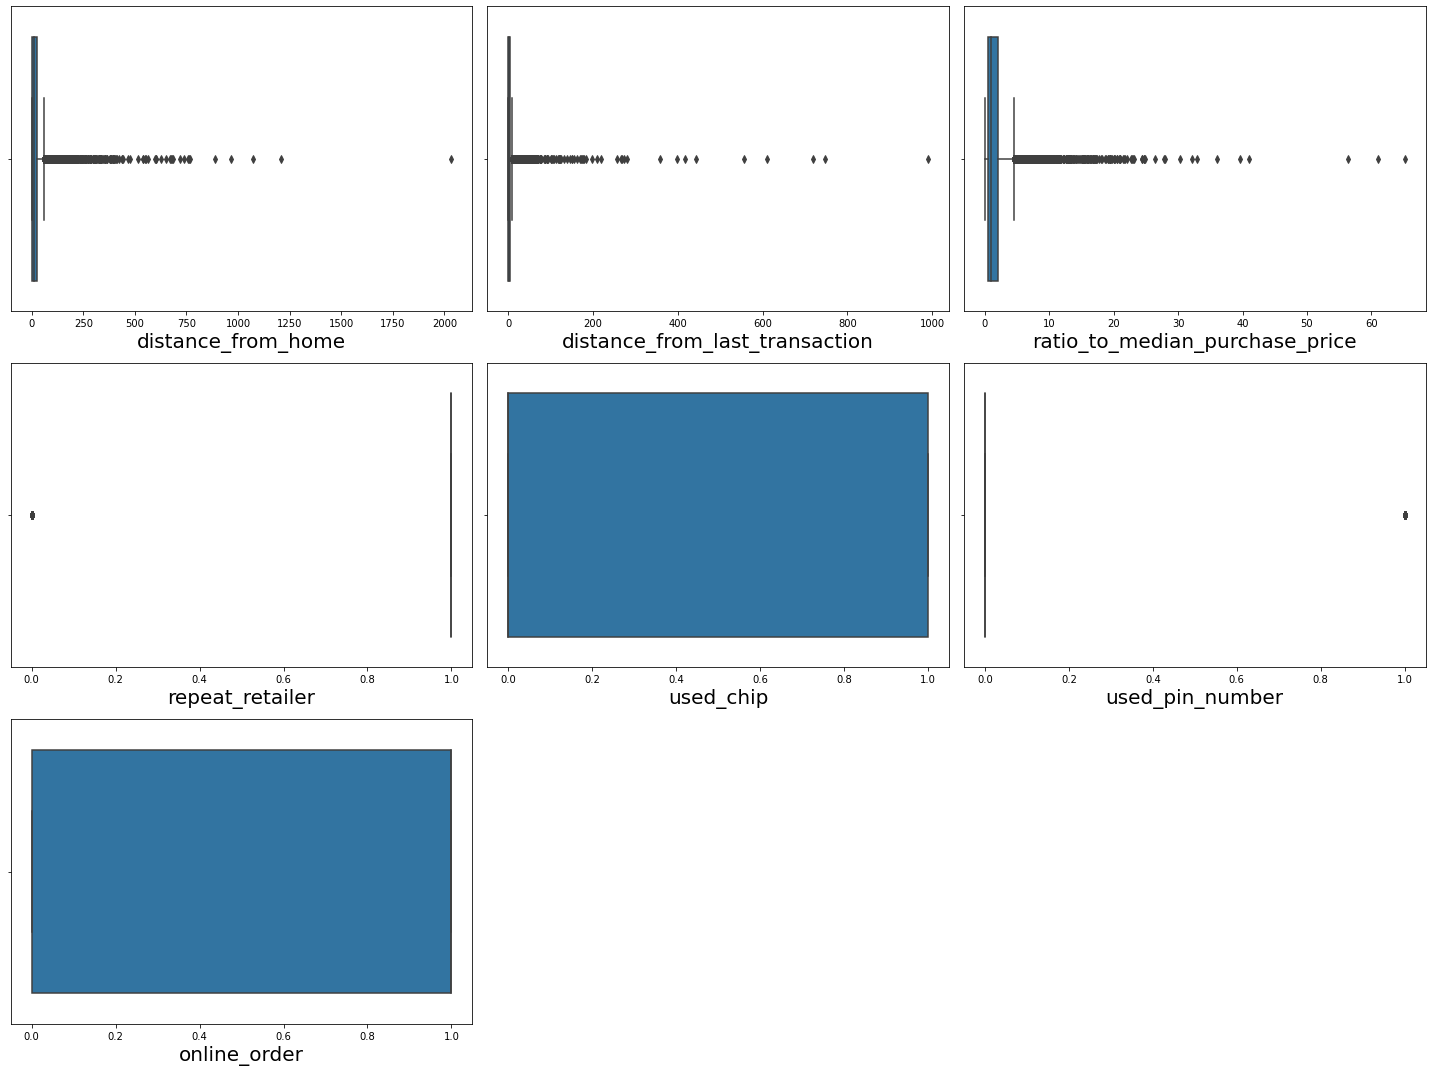

In [ ]:

plt.figure(figsize=(20,15))
plotnumber=1
for col in x.columns:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

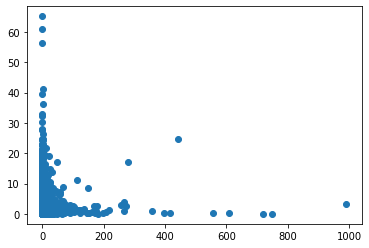

In [ ]:
plt.scatter(df1.distance_from_last_transaction,df1.ratio_to_median_purchase_price)
plt.show()

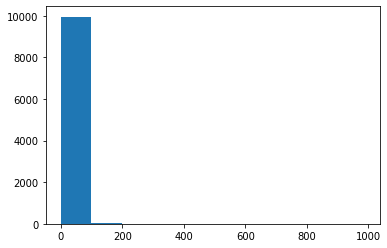

In [ ]:
plt.hist(df1.distance_from_last_transaction)
plt.show()

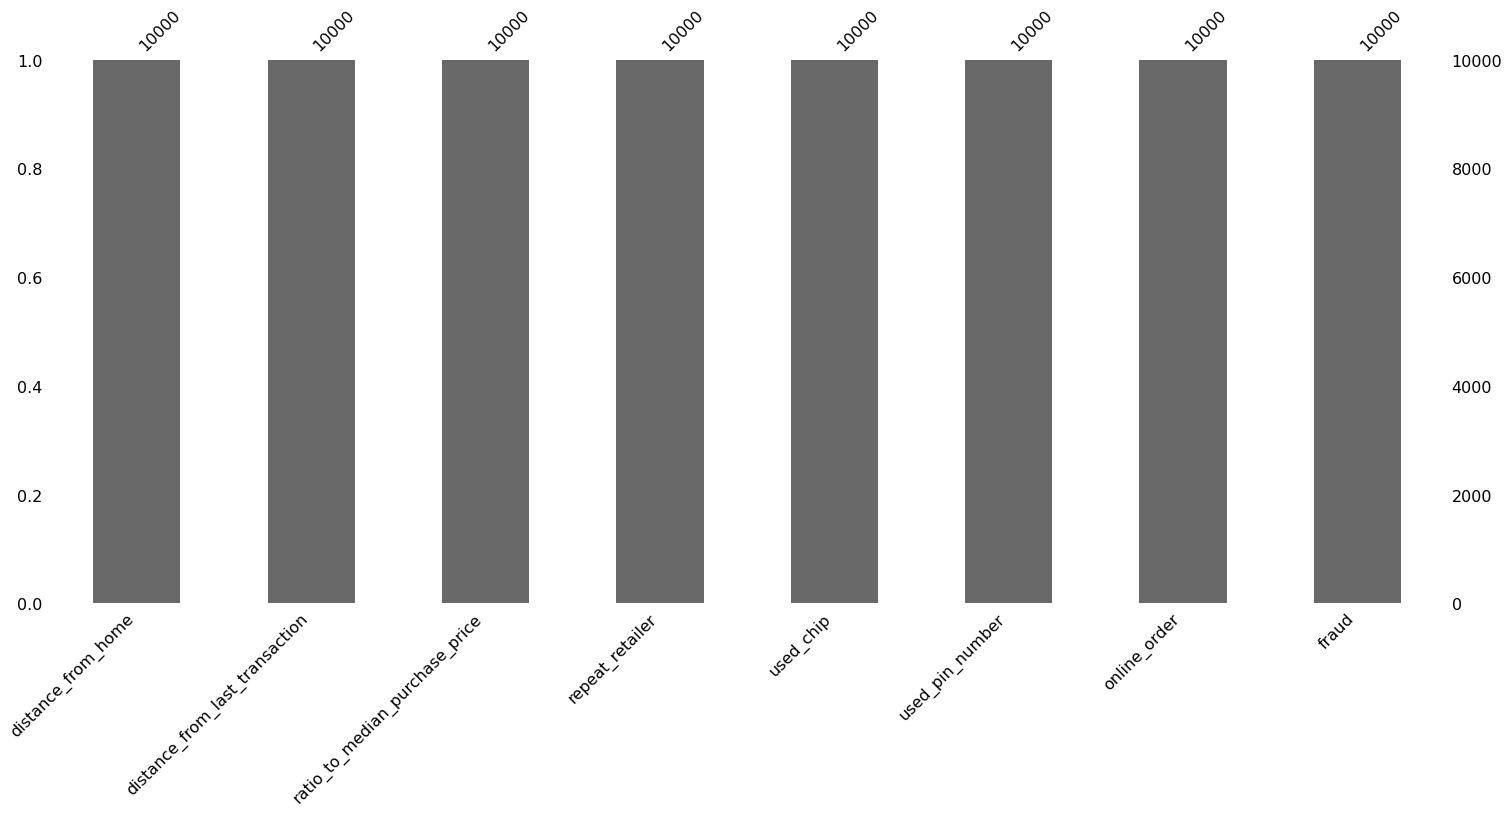

In [ ]:
import missingno as msno
msno.bar(df1)
plt.show()

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


In [ ]:
x=df1.drop('fraud',axis=1)
y=df1['fraud']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
a= StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.fit_transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[900,  21],
       [  0,  79]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.979

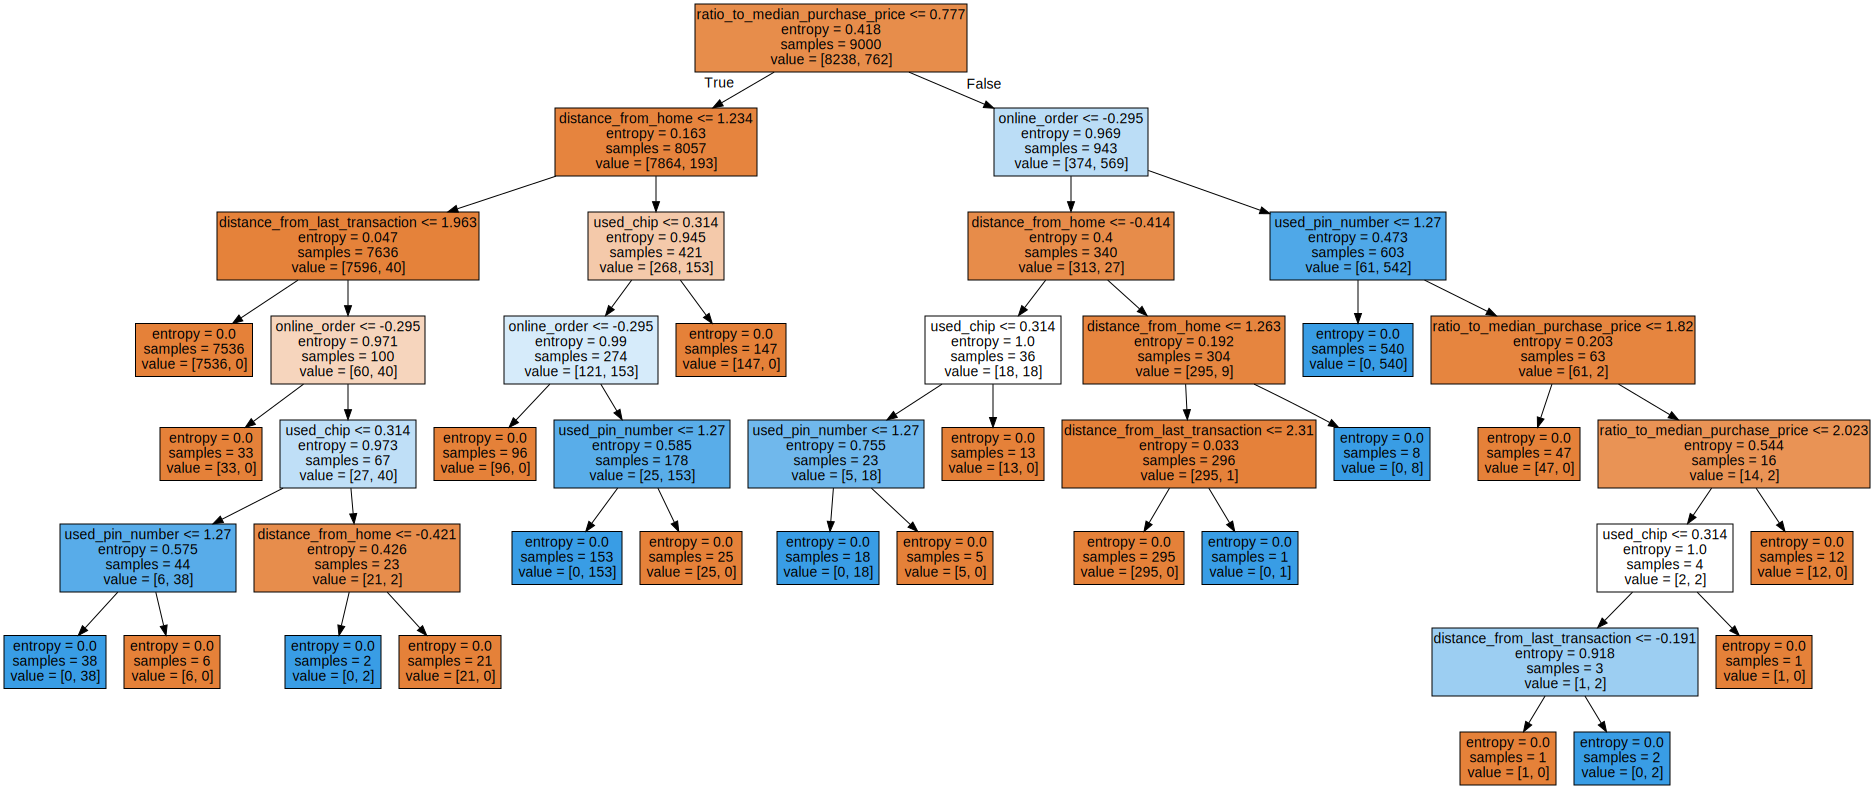

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.naive_bayes import GaussianNB


In [ ]:
clf1 = GaussianNB()
clf1.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = clf1.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[898,  23],
       [ 25,  54]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

accuracy_score(y_test,y_pred)

0.952